In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)

##### Description
- listing_id: Unique identifier for the listing
- listing_name: Title of the listing
- listing_type: Type of property (e.g., apartment, house, villa)
- room_type: Type of room (e.g., entire home, private room)
- host_id: Unique identifier for the host
- host_name: Name of the host
- has_cohost: If co-hosts associated with the listing
- superhost: Whether the host is a superhost
- country: Country where the listing is located
- state: State or province where the listing is located
- city: City where the listing is located
- latitude: Geographical latitude coordinate
- longitude: Geographical longitude coordinate
- guests: Maximum number of guests allowed
- available_bedrooms: Number of bedrooms available
- beds: Number of beds available
- baths: Number of bathrooms available
- registration: Indicates if the listing has a registration number
- amenities: List of amenities offered
- instant_book: Whether the listing can be booked instantly
- min_nights: Minimum number of nights required to book
- cancellation_policy: Type of cancellation policy offered
- currency: Currency used for pricing
- cleaning_fee: The cleaning fee for the listing
- extra_guest_fee: Fee for each extra guest
- num_reviews: Total number of reviews received
- rating_overall: Overall rating score
- rating_accuracy: Rating score for listing accuracy
- rating_checkin: Rating score for check-in experience
- rating_cleanliness: Rating score for cleanliness
- rating_communication: Rating score for host communication
- rating_location: Rating score for location
- rating_value: Rating score for value
- ttm_revenue: Total revenue in trailing twelve months
- ttm_revenue_native: Total revenue in native currency in trailing twelve months
- ttm_avg_rate: Average daily rate in trailing twelve months
- ttm_avg_rate_native: Average daily rate in native currency in trailing twelve months
- ttm_occupancy: Occupancy rate in trailing twelve months
- ttm_adjusted_occupancy: Adjusted occupancy rate in trailing twelve months, excluding owner-blocked days
- ttm_revpar: Revenue per available room (RevPAR) in trailing twelve months
- ttm_revpar_native: Revenue per available room (RevPAR) in native currency in trailing twelve months
- ttm_adjusted_revpar: Adjusted RevPAR in trailing twelve months
- ttm_adjusted_revpar_native: Adjusted RevPAR in native currency in trailing twelve months
- ttm_reserved_days: Number of booked/reserved days in trailing twelve months
- ttm_blocked_days: Number of host-blocked days in trailing twelve months
- ttm_available_days:	Number of available days in trailing twelve months
- ttm_total_days: Total number of days in trailing twelve months (reserved + available)
- l90d_revenue: Revenue in the last 90 days
- l90d_revenue_native: Revenue in native currency in the last 90 days
- l90d_avg_rate: Average daily rate in the last 90 days
- l90d_avg_rate_native: Average daily rate in native currency in the last 90 days
- l90d_occupancy:	Occupancy rate in the last 90 days
- l90d_adjusted_occupancy: Adjusted occupancy rate in the last 90 days
- l90d_revpar: RevPAR in the last 90 days
- l90d_revpar_native:	RevPAR in native currency in the last 90 days
- l90d_adjusted_revpar: Adjusted RevPAR in the last 90 days
- l90d_adjusted_revpar_native: Adjusted RevPAR in native currency in the last 90 days
- l90d_reserved_days:	Number of reserved days in the last 90 days
- l90d_blocked_days:	Number of blocked days in the last 90 days
- l90d_available_days: Number of available days in the last 90 days
- l90d_total_days: Total number of days considered in the last 90 days period "

In [3]:
# Loading the datasets
listings = pd.read_csv("Listings.csv")
cal_rates = pd.read_csv("Calender-rates.csv")
past_cal_rates = pd.read_csv("Past-calender-rates.csv")
reviews = pd.read_csv("Reviews.csv")
listings

,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,13913,Holiday London DB Room Let-on going,Private room in rental unit,private_room,https://a0.muscache.com/im/pictures/miso/Hosti...,15,54730,Alina,NaN,NaN,...,0.3,0.0,29.9,22.4,0.0,0.0,26,0,64,90
1,15400,Bright Chelsea Apartment. Chelsea!,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/428392/462...,16,60302,Philippa,NaN,NaN,...,0.0,1.0,5.3,4.0,158.7,119.3,3,87,87,90
2,31036,Bright compact 1 Bedroom Apartment Brick Lane,Entire condo,entire_home,https://a0.muscache.com/im/pictures/miso/Hosti...,21,133271,Hendryks,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90
3,34935,Bright 1 Bedroom Apartment w 2 beds Brick Lane,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/miso/Hosti...,17,133271,Hendryks,"336059,694381310","Thomas,Glen Paulo",...,0.1,0.2,32.8,24.5,54.6,40.9,11,36,79,90
4,36299,Kew Gardens 3BR house in cul-de-sac,Entire townhouse,entire_home,https://a0.muscache.com/im/pictures/457052/6e8...,20,155938,Geert,NaN,NaN,...,0.8,1.0,288.8,215.7,342.1,255.4,74,14,16,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,536794,Double bedroom in South West London,Private room in rental unit,private_room,https://a0.muscache.com/im/pictures/23948298/5...,4,1330009,Annamaria,NaN,NaN,...,0.2,0.0,16.3,12.2,0.0,0.0,16,0,74,90
296,538156,Penthouse Apartment London Bridge,Entire loft,entire_home,https://a0.muscache.com/im/pictures/32458779/c...,16,1952637,Blair,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,43,90,90
297,538558,"Bloomsbury, beautiful studio",Entire townhouse,entire_home,https://a0.muscache.com/im/pictures/0989ab13-2...,11,2645421,Sybille,NaN,NaN,...,0.1,0.3,19.9,14.8,52.7,39.2,9,56,81,90
298,539042,Boutique style Bedroom with private bathroom,Private room in home,private_room,https://a0.muscache.com/im/pictures/6862976/d6...,33,2648082,Sarah,NaN,NaN,...,0.8,0.0,69.2,51.6,0.0,0.0,75,0,15,90


In [4]:
listings.describe()

,listing_id,photos_count,host_id,latitude,longitude,guests,bedrooms,beds,baths,min_nights,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000,168.000000,173.000000,297.000000,300.000000,299.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,327338.770000,25.960000,2.417677e+06,51.506347,-0.132161,3.886905,1.768786,1.848485,0.730000,4.678930,...,0.356667,0.189000,63.077333,47.068333,33.365000,24.912333,32.200000,19.630000,57.800000,90.0
std,148824.453479,19.900213,1.213716e+07,0.047056,0.085075,2.137281,0.954644,1.310279,0.787932,8.847549,...,0.330484,0.309567,87.708245,65.442296,67.336345,50.267171,29.440831,28.028529,29.440831,0.0
min,13913.000000,2.000000,4.303900e+04,51.366500,-0.461800,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,90.0
25%,231277.250000,14.000000,8.104300e+05,51.475625,-0.195375,2.000000,1.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,4.575000,3.375000,0.000000,0.000000,3.000000,0.000000,30.000000,90.0
50%,363409.000000,21.500000,1.641406e+06,51.512750,-0.121500,4.000000,2.000000,1.000000,1.000000,3.000000,...,0.300000,0.000000,32.150000,24.000000,0.000000,0.000000,26.000000,0.000000,64.000000,90.0
75%,446054.000000,34.000000,2.062346e+06,51.540325,-0.077525,5.000000,2.000000,2.000000,1.000000,5.000000,...,0.700000,0.300000,84.925000,63.400000,41.325000,30.950000,60.000000,32.250000,87.000000,90.0
max,541363.000000,220.000000,2.033438e+08,51.656400,0.107300,13.000000,5.000000,10.000000,4.000000,91.000000,...,1.000000,1.000000,772.500000,576.100000,497.400000,369.900000,88.000000,90.000000,90.000000,90.0


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   300 non-null    int64  
 1   listing_name                 297 non-null    object 
 2   listing_type                 300 non-null    object 
 3   room_type                    300 non-null    object 
 4   cover_photo_url              300 non-null    object 
 5   photos_count                 300 non-null    int64  
 6   host_id                      300 non-null    int64  
 7   host_name                    287 non-null    object 
 8   cohost_ids                   20 non-null     object 
 9   cohost_names                 20 non-null     object 
 10  superhost                    300 non-null    bool   
 11  latitude                     300 non-null    float64
 12  longitude                    300 non-null    float64
 13  guests              

In [6]:
cal_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3312 non-null   int64  
 1   date                    3312 non-null   object 
 2   vacant_days             3312 non-null   int64  
 3   reserved_days           3312 non-null   int64  
 4   occupancy               3312 non-null   float64
 5   revenue                 3312 non-null   float64
 6   rate_avg                3312 non-null   float64
 7   booked_rate_avg         913 non-null    float64
 8   booking_lead_time_avg   648 non-null    float64
 9   length_of_stay_avg      648 non-null    float64
 10  min_nights_avg          3182 non-null   float64
 11  native_booked_rate_avg  913 non-null    float64
 12  native_rate_avg         3312 non-null   float64
 13  native_revenue          3312 non-null   float64
dtypes: float64(10), int64(3), object(1)
memo

In [7]:
past_cal_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3464 non-null   int64  
 1   date                    3464 non-null   object 
 2   vacant_days             3464 non-null   int64  
 3   reserved_days           3464 non-null   int64  
 4   occupancy               3464 non-null   float64
 5   revenue                 3464 non-null   float64
 6   rate_avg                3464 non-null   float64
 7   booked_rate_avg         2389 non-null   float64
 8   booking_lead_time_avg   2205 non-null   float64
 9   length_of_stay_avg      2205 non-null   float64
 10  min_nights_avg          2024 non-null   float64
 11  native_booked_rate_avg  2389 non-null   float64
 12  native_rate_avg         3464 non-null   float64
 13  native_revenue          3464 non-null   float64
dtypes: float64(10), int64(3), object(1)
memo

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   1257 non-null   int64 
 1   date         1257 non-null   object
 2   num_reviews  1257 non-null   int64 
 3   reviewers    1257 non-null   object
dtypes: int64(2), object(2)
memory usage: 39.4+ KB


In [9]:
listings['listing_id'].nunique()

300

In [10]:
reviews['listing_id'].nunique()

260

In [11]:
past_cal_rates['listing_id'].nunique()

300

In [12]:
# There are multiple records for the same listing_id in the past, future cal rates and the reviews dataset
# I am going to aggregate some columns so i can merge the 4 datasets via listing_id on a 1:1 basis

# Reviews
agg_reviews = reviews.groupby('listing_id').agg({
    'num_reviews': 'sum',
}).rename(columns={'num_reviews': 'total_reviews'}).reset_index()

# cal_rates
agg_cal_rates = cal_rates.groupby('listing_id').agg({
    'vacant_days' : 'mean',
    'reserved_days' : 'mean',
    'occupancy' : 'mean',
    'revenue' : 'sum',
    'rate_avg' : 'mean',
    'booked_rate_avg' : 'mean',
    'length_of_stay_avg' : 'mean',
    'min_nights_avg' : 'mean',
    'native_revenue' : 'mean'
}).rename(columns={'vacant_days': 'avg_vacant_days',
                       'reserved_days' : 'avg_reserved_days',
                       'occupancy': 'avg_occupancy',
                       'revenue': 'tot_revenue',
                       'native_revenue': 'avg_native_revenue'
                  }).reset_index()

# past cal_rates
agg_past_cal_rates = past_cal_rates.groupby('listing_id').agg({
    'vacant_days' : 'mean',
    'reserved_days' : 'mean',
    'occupancy' : 'mean',
    'revenue' : 'sum',
    'rate_avg' : 'mean',
    'booked_rate_avg' : 'mean',
    'length_of_stay_avg' : 'mean',
    'min_nights_avg' : 'mean',
    'native_revenue' : 'mean'
}).rename(columns={'vacant_days': 'avg_vacant_days',
                       'reserved_days' : 'avg_reserved_days',
                       'occupancy': 'avg_occupancy',
                       'revenue': 'tot_revenue',
                       'native_revenue': 'avg_native_revenue'
                  }).reset_index()

In [13]:
agg_past_cal_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          300 non-null    int64  
 1   avg_vacant_days     300 non-null    float64
 2   avg_reserved_days   300 non-null    float64
 3   avg_occupancy       300 non-null    float64
 4   tot_revenue         300 non-null    float64
 5   rate_avg            300 non-null    float64
 6   booked_rate_avg     300 non-null    float64
 7   length_of_stay_avg  299 non-null    float64
 8   min_nights_avg      290 non-null    float64
 9   avg_native_revenue  300 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


In [14]:
listings.head()

,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,13913,Holiday London DB Room Let-on going,Private room in rental unit,private_room,https://a0.muscache.com/im/pictures/miso/Hosti...,15,54730,Alina,NaN,NaN,...,0.3,0.0,29.9,22.4,0.0,0.0,26,0,64,90
1,15400,Bright Chelsea Apartment. Chelsea!,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/428392/462...,16,60302,Philippa,NaN,NaN,...,0.0,1.0,5.3,4.0,158.7,119.3,3,87,87,90
2,31036,Bright compact 1 Bedroom Apartment Brick Lane,Entire condo,entire_home,https://a0.muscache.com/im/pictures/miso/Hosti...,21,133271,Hendryks,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90
3,34935,Bright 1 Bedroom Apartment w 2 beds Brick Lane,Entire rental unit,entire_home,https://a0.muscache.com/im/pictures/miso/Hosti...,17,133271,Hendryks,"336059,694381310","Thomas,Glen Paulo",...,0.1,0.2,32.8,24.5,54.6,40.9,11,36,79,90
4,36299,Kew Gardens 3BR house in cul-de-sac,Entire townhouse,entire_home,https://a0.muscache.com/im/pictures/457052/6e8...,20,155938,Geert,NaN,NaN,...,0.8,1.0,288.8,215.7,342.1,255.4,74,14,16,90


In [15]:
listings.drop(['cover_photo_url', 'photos_count'], axis=1, inplace=True)

In [16]:
from functools import reduce

dfs = [listings, agg_cal_rates, agg_past_cal_rates, agg_reviews]
listing_df = reduce(lambda left, right: pd.merge(left, right, on='listing_id', how='left', suffixes=('_cal', '_pastCal')), dfs)

In [17]:
listing_df.shape

(300, 78)

In [18]:
listing_df.head(20)

,listing_id,listing_name,listing_type,room_type,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,...,avg_vacant_days_pastCal,avg_reserved_days_pastCal,avg_occupancy_pastCal,tot_revenue_pastCal,rate_avg_pastCal,booked_rate_avg_pastCal,length_of_stay_avg_pastCal,min_nights_avg_pastCal,avg_native_revenue_pastCal,total_reviews
0,13913,Holiday London DB Room Let-on going,Private room in rental unit,private_room,54730,Alina,NaN,NaN,True,51.5686,...,20.500000,9.916667,0.323250,9804.0,83.200000,83.541667,6.000000,1.000000,631.500000,10.0
1,15400,Bright Chelsea Apartment. Chelsea!,Entire rental unit,entire_home,60302,Philippa,NaN,NaN,False,51.4878,...,24.416667,6.000000,0.199083,11151.0,155.541667,154.075000,36.000000,4.000000,729.250000,1.0
2,31036,Bright compact 1 Bedroom Apartment Brick Lane,Entire condo,entire_home,133271,Hendryks,NaN,NaN,False,51.5243,...,22.416667,8.000000,0.264333,21480.0,237.458333,220.116667,11.000000,13.222222,1421.250000,2.0
3,34935,Bright 1 Bedroom Apartment w 2 beds Brick Lane,Entire rental unit,entire_home,133271,Hendryks,"336059,694381310","Thomas,Glen Paulo",False,51.5237,...,27.916667,2.500000,0.082333,7953.0,247.900000,258.025000,6.000000,13.250000,506.333333,2.0
4,36299,Kew Gardens 3BR house in cul-de-sac,Entire townhouse,entire_home,155938,Geert,NaN,NaN,False,51.4809,...,12.166667,18.250000,0.594750,77587.0,353.733333,355.780000,8.700000,3.000000,4974.333333,5.0
5,36660,You are GUARANTEED to love this,Private room in home,private_room,157884,Agri & Roger,NaN,NaN,True,51.5848,...,4.833333,25.583333,0.841750,33012.0,107.475000,107.533333,2.750000,2.000000,2126.000000,13.0
6,38995,SPACIOUS ROOM IN CONTEMPORARY STYLE FLAT,Private room in rental unit,private_room,167281,Cesar,NaN,NaN,True,51.4786,...,27.000000,3.416667,0.112083,2684.0,64.083333,65.281818,2.454545,1.000000,173.250000,13.0
7,41712,"Room with a view, shared flat, central Bankside",Private room in rental unit,private_room,182322,Nina,NaN,NaN,True,51.5019,...,25.250000,5.166667,0.169167,7313.0,118.250000,118.825000,6.500000,2.000000,456.500000,8.0
8,42010,You Will Save Money Here,Private room in home,private_room,157884,Agri & Roger,NaN,NaN,True,51.5859,...,4.166667,26.250000,0.863083,25898.0,82.008333,82.091667,3.250000,1.875000,1663.250000,24.0
9,43129,Quiet Comfortable Room in Fulham,Private room in townhouse,private_room,188138,Sylvan,NaN,NaN,True,51.4816,...,16.916667,13.500000,0.443833,11396.0,69.575000,69.554545,7.100000,2.857143,723.916667,11.0


In [19]:
df = listing_df.copy()

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.isnull().sum()

listing_id                       0
listing_name                     3
listing_type                     0
room_type                        0
host_id                          0
host_name                       13
cohost_ids                     280
cohost_names                   280
superhost                        0
latitude                         0
longitude                        0
guests                         132
bedrooms                       127
beds                             3
baths                            0
registration                    13
amenities                        0
instant_book                    34
min_nights                       1
cancellation_policy              5
currency                         0
cleaning_fee                    15
extra_guest_fee                 34
num_reviews                      0
rating_overall                   2
rating_accuracy                  2
rating_checkin                   2
rating_cleanliness               2
rating_communication

In [21]:
# Filling the missing listing names with its corresponding room type since it's not so important.
df['listing_name'] = df['listing_name'].fillna(df['room_type'])

In [22]:
df.isnull().sum()

listing_id                       0
listing_name                     0
listing_type                     0
room_type                        0
host_id                          0
host_name                       13
cohost_ids                     280
cohost_names                   280
superhost                        0
latitude                         0
longitude                        0
guests                         132
bedrooms                       127
beds                             3
baths                            0
registration                    13
amenities                        0
instant_book                    34
min_nights                       1
cancellation_policy              5
currency                         0
cleaning_fee                    15
extra_guest_fee                 34
num_reviews                      0
rating_overall                   2
rating_accuracy                  2
rating_checkin                   2
rating_cleanliness               2
rating_communication

In [23]:
# Missing host names
df[df['host_name'].isnull()]

,listing_id,listing_name,listing_type,room_type,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days,avg_vacant_days_cal,avg_reserved_days_cal,avg_occupancy_cal,tot_revenue_cal,rate_avg_cal,booked_rate_avg_cal,length_of_stay_avg_cal,min_nights_avg_cal,avg_native_revenue_cal,avg_vacant_days_pastCal,avg_reserved_days_pastCal,avg_occupancy_pastCal,tot_revenue_pastCal,rate_avg_pastCal,booked_rate_avg_pastCal,length_of_stay_avg_pastCal,min_nights_avg_pastCal,avg_native_revenue_pastCal,total_reviews
14,49970,Beautiful Small Studio Hammersmith,Room in serviced apartment,hotel_room,216660,NaN,NaN,NaN,False,51.4946,-0.2292,2.0,1.0,1.0,1.0,NaN,"Pool,Air conditioning,Wifi,Kitchen,Cable TV,Dr...",NaN,1.0,Strict,GBP,0.0,NaN,201,4.71,4.8,4.9,4.7,4.8,4.8,4.7,30433.0,23656.0,106.0,81.9,0.8,0.9,83.4,64.8,96.6,75.1,290,50,75,365,3348.0,2514.0,112.1,83.7,0.3,0.8,37.2,27.9,83.7,62.8,30,50,60,90,24.833333,5.583333,0.181667,7532.0,112.241667,112.533333,3.333333,1.5,466.75,6.250000,24.166667,0.794250,30433.0,105.958333,105.381818,4.80,2.166667,1970.916667,19.0
72,219665,Awesome Room near Central London,Private room in condo,private_room,829010,NaN,NaN,NaN,False,51.4740,-0.0790,2.0,1.0,2.0,1.0,NaN,"Elevator,Air conditioning,Wifi,Kitchen,Cable T...",NaN,14.0,NaN,GBP,NaN,NaN,150,4.81,4.9,4.9,4.9,4.9,4.5,4.8,1313.0,1027.0,72.7,56.9,0.0,0.1,3.6,2.8,3.7,2.9,18,12,347,365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.714286,2.571429,0.083571,1313.0,72.728571,73.150000,4.00,NaN,146.428571,NaN
79,241621,"Bright Double room, London. Zone 3",Private room in townhouse,private_room,1267045,NaN,NaN,NaN,False,51.4287,-0.1573,1.0,1.0,1.0,1.0,NaN,"Air conditioning,Wifi,Kitchen,Dryer,Hair dryer...",NaN,3.0,Strict,GBP,NaN,NaN,115,4.74,4.8,4.8,4.7,4.9,4.5,4.8,1566.0,1225.0,68.7,53.7,0.1,0.1,4.3,3.4,4.7,3.7,25,32,340,365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.714286,3.571429,0.115143,1566.0,68.685714,62.600000,16.00,NaN,175.714286,NaN
82,244126,"Artist's City Retreat, Hoxton with Panoramic V...",Entire condo,entire_home,1270755,NaN,NaN,NaN,True,51.5330,-0.0830,6.0,2.0,2.0,1.0,NaN,"Elevator,Air conditioning,Wifi,Kitchen,Dryer,H...",NaN,1.0,Strict,GBP,NaN,NaN,163,4.59,4.5,4.8,4.4,4.9,4.6,4.5,7751.0,6008.0,285.8,223.1,0.1,0.1,21.2,16.5,21.4,16.6,26,3,339,365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.571429,3.714286,0.121714,7751.0,286.085714,293.520000,2.00,NaN,857.857143,NaN
84,252016,Georgian heaven,Private room in home,private_room,1322089,NaN,NaN,NaN,True,51.4762,-0.0609,1.0,3.0,1.0,2.0,NaN,"Air conditioning,Wifi,Kitchen,Cable TV,Dryer,T...",NaN,2.0,Flexible,GBP,NaN,NaN,12,5.00,4.9,5.0,4.9,5.0,4.8,5.0,1069.0,839.0,83.5,64.5,0.0,0.1,2.9,2.3,9.1,7.2,13,248,352,365,0.0,0.0,89.3,66.6,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,30.416667,0.000000,0.000000,0.0,89.241667,NaN,NaN,NaN,0.00,29.333333,1.083333,0.034917,1069.0,83.433333,82.200000,3.00,NaN,70.000000,NaN
134,338354,Sunny comfortable double room Zone2,Private room in home,private_room,1719023,NaN,NaN,NaN,True,51.4680,-0.0500,1.0,1.0,1.0,1.0,NaN,"Air conditioning,Wifi,Kitchen,Dryer,Dedicated ...",NaN,4.0,Strict,GBP,10.0,Na

In [24]:
# Checking if some of the missing host_name were captured in other records in the dataset using the host_id
nan_hostname_id = df[df.host_name.isnull()]['host_id']
for i in nan_hostname_id:
    names = df[df.host_id == i]['host_name'].dropna().unique()
    if names.size > 0:
        print(f"{i} belongs to {names}")
    else:
        print(f"{i} has no name")

216660 belongs to ['Boris']
829010 has no name
1267045 has no name
1270755 belongs to ['Claire']
1322089 has no name
1719023 has no name
710493 has no name
1954407 has no name
1961516 has no name
2214214 has no name
2425662 has no name
2183437 has no name
2582452 has no name


In [25]:
# Filling 2 of the missing host_names found in the step above
df.loc[(df['host_id'] == 216660) & df['host_name'].isna(), 'host_name'] = 'Boris'
df.loc[(df['host_id'] == 1270755) & df['host_name'].isna(), 'host_name'] = 'Claire'

In [26]:
df[df['host_id'] == 216660]['host_name']

13    Boris
14    Boris
16    Boris
18    Boris
19    Boris
Name: host_name, dtype: object

In [27]:
# Since i can't find any other information that'll suggest who the missing hosts might be, i'll fill in 'John Doe'
df['host_name'] = df['host_name'].fillna('John Doe')

In [28]:
df['host_name'].isna().sum()

0

In [29]:
# Create new indicator column for cohost presence
df['has_cohost'] = df['cohost_ids'].notna().astype(int)

# Drop the cohost info columns as it won't be important to my analysis
df.drop(['cohost_ids', 'cohost_names'], axis=True, inplace=True)

In [30]:
cols = ['listing_id', 'listing_name', 'listing_type', 'room_type', 'host_id',
       'host_name', 'has_cohost', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms',
       'beds', 'baths', 'registration', 'amenities', 'instant_book',
       'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee',
       'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy',
       'rating_checkin', 'rating_cleanliness', 'rating_communication',
       'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native',
       'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy',
       'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native',
       'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native',
       'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days',
       'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native',
       'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy',
       'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_revpar_native',
       'l90d_adjusted_revpar', 'l90d_adjusted_revpar_native',
       'l90d_reserved_days', 'l90d_blocked_days', 'l90d_available_days',
       'l90d_total_days', 'avg_vacant_days_cal', 'avg_reserved_days_cal',
       'avg_occupancy_cal', 'tot_revenue_cal', 'rate_avg_cal',
       'booked_rate_avg_cal', 'length_of_stay_avg_cal', 'min_nights_avg_cal',
       'avg_native_revenue_cal', 'avg_vacant_days_pastCal',
       'avg_reserved_days_pastCal', 'avg_occupancy_pastCal',
       'tot_revenue_pastCal', 'rate_avg_pastCal', 'booked_rate_avg_pastCal',
       'length_of_stay_avg_pastCal', 'min_nights_avg_pastCal',
       'avg_native_revenue_pastCal', 'total_reviews']

df = df[cols]
df.head()

,listing_id,listing_name,listing_type,room_type,host_id,host_name,has_cohost,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days,avg_vacant_days_cal,avg_reserved_days_cal,avg_occupancy_cal,tot_revenue_cal,rate_avg_cal,booked_rate_avg_cal,length_of_stay_avg_cal,min_nights_avg_cal,avg_native_revenue_cal,avg_vacant_days_pastCal,avg_reserved_days_pastCal,avg_occupancy_pastCal,tot_revenue_pastCal,rate_avg_pastCal,booked_rate_avg_pastCal,length_of_stay_avg_pastCal,min_nights_avg_pastCal,avg_native_revenue_pastCal,total_reviews
0,13913,Holiday London DB Room Let-on going,Private room in rental unit,private_room,54730,Alina,0,True,51.5686,-0.1127,NaN,NaN,1.0,0.0,False,"Wifi,Lake access,Kitchen,Board games,Hot water...",False,1.0,Moderate,GBP,20.0,0.0,54,4.85,4.8,4.8,4.8,4.9,4.8,4.8,9804.0,7582.0,83.2,64.1,0.3,0.0,26.9,20.8,0.0,0.0,119,0,246,365,2695.0,2012.0,102.7,76.6,0.3,0.0,29.9,22.4,0.0,0.0,26,0,64,90,29.333333,1.083333,0.035000,1142.0,87.616667,89.550000,6.500000,1.000000,70.750000,20.500000,9.916667,0.323250,9804.0,83.200000,83.541667,6.0,1.000000,631.500000,10.0
1,15400,Bright Chelsea Apartment. Chelsea!,Entire rental unit,entire_home,60302,Philippa,0,False,51.4878,-0.1681,2.0,1.0,1.0,1.0,False,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Hot ...",False,4.0,Strict,GBP,94.0,0.0,97,4.80,4.9,4.9,4.9,4.8,4.9,4.7,11151.0,8755.0,155.6,120.2,0.2,0.9,30.6,24.0,141.2,110.8,72,286,293,365,476.0,358.0,156.7,117.0,0.0,1.0,5.3,4.0,158.7,119.3,3,87,87,90,12.750000,17.666667,0.583333,33358.0,158.841667,157.342857,70.666667,4.000000,2066.833333,24.416667,6.000000,0.199083,11151.0,155.541667,154.075000,36.0,4.000000,729.250000,1.0
2,31036,Bright compact 1 Bedroom Apartment Brick Lane,Entire condo,entire_home,133271,Hendryks,0,False,51.5243,-0.0700,4.0,1.0,2.0,1.0,False,"Wifi,Kitchen,Room-darkening shades,Portable fa...",NaN,1.0,Firm,GBP,117.0,NaN,123,4.72,4.8,4.8,4.8,4.8,4.6,4.7,21480.0,17057.0,237.6,183.3,0.3,0.3,58.8,46.7,59.2,47.0,96,2,269,365,0.0,0.0,269.8,201.3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,30.333333,0.083333,0.002750,268.0,235.291667,268.000000,1.000000,25.875000,16.583333,22.416667,8.000000,0.264333,21480.0,237.458333,220.116667,11.0,13.222222,1421.250000,2.0
3,34935,Bright 1 Bedroom Apartment w 2 beds Brick Lane,Entire rental unit,entire_home,133271,Hendryks,1,False,51.5237,-0.0689,4.0,1.0,2.0,1.0,False,"TV,Cable TV,Wifi,Kitchen,Hot water kettle,Paid...",True,2.0,Firm,GBP,123.0,0.0,127,4.55,4.7,4.8,4.7,4.7,4.6,4.5,7953.0,6075.0,247.9,191.4,0.1,0.1,21.8,16.6,25.2,19.3,30,50,335,365,2951.0,2206.0,269.7,201.3,0.1,0.2,32.8,24.5,54.6,40.9,11,36,79,90,30.333333,0.083333,0.002750,300.0,276.625000,300.000000,1.000000,23.545455,18.583333,27.916667,2.500000,0.082333,7953.0,247.900000,258.025000,6.0,13.250000,506.333333,2.0
4,36299,Kew Gardens 3BR house in cul-de-sac,Entire townhouse,entire_home,155938,Geert,0,False,51.4809,-0.2809,5.0,3.0,3.0,1.5,False,"High chair,Children’s books and toys,Wifi,Kitc...",False,7.0,Strict,GBP,0.0,0.0,115,4.79,4.8,4.9,4.8,5.0,4.9,4.6,77587.0,59689.0,353.7,273.4,0.6,0.8,212.6,163.5,298.4,229.6,219,105,146,365,25996.0,19409.0,349.6,260.9,0.8,1.0,288.8,215.7,342.1,255.4,74,14,16,90,27.500000,2.916667,0.094583,12483.0,358.858333,361.450000,6.500000,3.000000,773.500000,12.166667,18.250000,0.

In [31]:
df[df['guests'].isnull()]['room_type'].unique()

array(['private_room'], dtype=object)

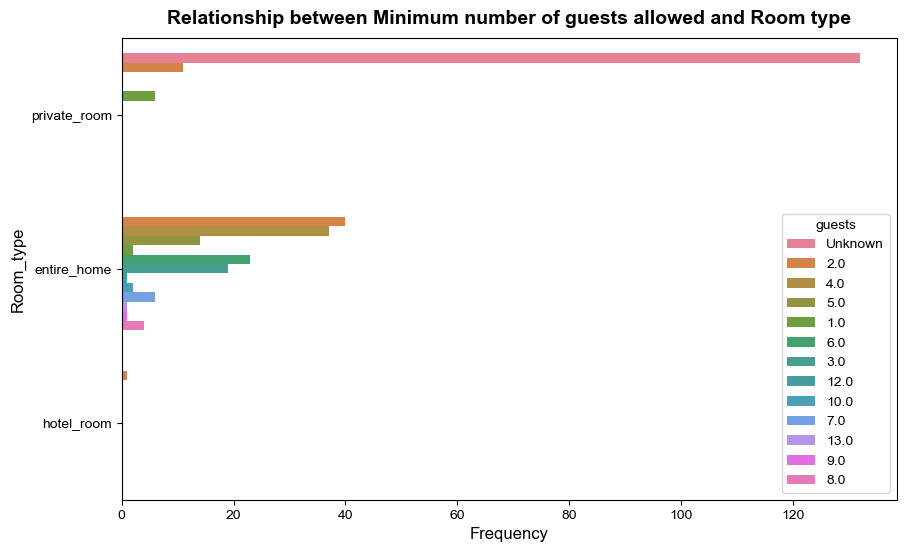

In [32]:
# Filling the missing guests col with unkown so i can visualize it.
df['guests'] = df['guests'].fillna('Unknown').astype(str)

# visualizing guests vs room_type
plt.figure(figsize=(10, 6))
sns.countplot(
    df, 
    y='room_type', 
    hue='guests'
    
)
plt.title('Relationship between Minimum number of guests allowed and Room type', size=14, weight='bold', pad=10)
plt.xlabel('Frequency', size=12)
plt.ylabel('Room_type', size=12)
sns.set_style('whitegrid')
plt.show()

From the countplot above, 
- only private rooms have unkown number of guests.
- Private rooms only allow a maximum of 2 guests.

So, it is safe to assume that the unknown number of guests fall under 1 or 2 guests.


In [34]:
df['guests'] = df['guests'].replace('Unknown', np.nan)

guest_by_roomtype = df.groupby(['room_type', 'guests']).size().unstack().fillna(0)
guest_by_roomtype_norm =  guest_by_roomtype.div(guest_by_roomtype.sum(axis=0), axis=1)
guest_by_roomtype_norm

guests,1.0,10.0,12.0,13.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
room_type,,,,,,,,,,,,
entire_home,0.25,1.0,1.0,1.0,0.769231,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hotel_room,0.00,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,0.0,0.0,0.0,0.0
private_room,0.75,0.0,0.0,0.0,0.211538,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Getting the missing guests from the weighted probability of the room_type
def infer_n_guests(row):
     if pd.isna(row['guests']):
         probs = guest_by_roomtype_norm.loc[row['room_type']]
         n_guest = probs.index
         weight = probs.values/probs.values.sum()
         return np.random.choice(n_guest, p=weight)
     return row['guests']

df['guests'] = df.apply(infer_n_guests, axis=1)

In [36]:
df.guests.isnull().sum()

0

The bedrooms column is for the number of bedrooms available... so, even a private room listing can have more than 1 room available for rent.

In [38]:
# Figuring out the missing bedrooms records
df[df['bedrooms'].isnull()]['room_type'].unique()

array(['private_room', 'entire_home'], dtype=object)

In [39]:
df[(df['bedrooms'].isnull()) & (df['room_type'] == 'private_room')].shape[0]

125

In [40]:
df[df['room_type'] == 'private_room']['bedrooms'].unique()

array([nan,  1.,  2.,  3.])

In [41]:
df[(df['bedrooms'].isnull()) & (df['room_type'] == 'entire_home')].shape[0]

2

In [42]:
df[(df['room_type'] == 'private_room') & (df['bedrooms'] > 1)]

,listing_id,listing_name,listing_type,room_type,host_id,host_name,has_cohost,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days,avg_vacant_days_cal,avg_reserved_days_cal,avg_occupancy_cal,tot_revenue_cal,rate_avg_cal,booked_rate_avg_cal,length_of_stay_avg_cal,min_nights_avg_cal,avg_native_revenue_cal,avg_vacant_days_pastCal,avg_reserved_days_pastCal,avg_occupancy_pastCal,tot_revenue_pastCal,rate_avg_pastCal,booked_rate_avg_pastCal,length_of_stay_avg_pastCal,min_nights_avg_pastCal,avg_native_revenue_pastCal,total_reviews
40,96052,clean double room in Zone 2 for a female,Private room in condo,private_room,448154,Aneta,0,True,51.5593,-0.2250,1.0,2.0,1.0,0.0,False,"Wifi,Air conditioning,Kitchen,Hot water kettle...",NaN,3.0,Strict,GBP,25.0,NaN,85,4.82,4.7,4.9,4.7,4.9,4.5,4.7,2774.0,2121.0,73.1,56.3,0.1,0.2,7.6,5.8,10.7,8.2,43,105,322,365,0.0,0.0,87.3,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,30.416667,0.000000,0.000000,0.0,88.925000,NaN,NaN,3.0,0.000000,26.833333,3.583333,0.117000,2774.0,73.008333,64.650000,9.250000,3.0,177.000000,1.0
71,216350,Double room in family house - cost for 1 room ...,Private room in townhouse,private_room,1116804,Debbie,0,True,51.4793,-0.2206,2.0,3.0,3.0,0.0,False,"TV,Cable TV,Wifi,Crib,Kitchen,Pack ’n play/Tra...",False,1.0,Strict,GBP,36.0,36.0,334,4.87,4.9,5.0,4.9,5.0,4.8,4.8,7971.0,6108.0,119.0,91.8,0.2,0.2,21.8,16.7,22.0,16.8,66,2,299,365,2656.0,1974.0,135.4,101.0,0.2,0.2,29.5,21.9,30.2,22.4,20,2,70,90,29.000000,1.416667,0.045917,2396.0,125.058333,130.533333,4.666667,1.0,148.500000,24.916667,5.500000,0.179833,7971.0,118.975000,118.754545,1.545455,1.0,509.000000,2.0
84,252016,Georgian heaven,Private room in home,private_room,1322089,John Doe,0,True,51.4762,-0.0609,1.0,3.0,1.0,2.0,NaN,"Air conditioning,Wifi,Kitchen,Cable TV,Dryer,T...",NaN,2.0,Flexible,GBP,NaN,NaN,12,5.00,4.9,5.0,4.9,5.0,4.8,5.0,1069.0,839.0,83.5,64.5,0.0,0.1,2.9,2.3,9.1,7.2,13,248,352,365,0.0,0.0,89.3,66.6,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,30.416667,0.000000,0.000000,0.0,89.241667,NaN,NaN,NaN,0.000000,29.333333,1.083333,0.034917,1069.0,83.433333,82.200000,3.000000,NaN,70.000000,NaN
144,351727,"Bright airy double room, central",Private room in rental unit,private_room,1781664,Hilda,0,False,51.4537,-0.1101,1.0,2.0,1.0,0.0,False,"Wifi,Kitchen,Hot water kettle,Paid parking off...",False,2.0,Moderate,GBP,0.0,0.0,261,4.65,4.8,4.8,4.7,4.9,4.6,4.7,10241.0,7885.0,41.8,32.3,0.7,0.8,28.1,21.6,33.1,25.5,243,56,122,365,2597.0,1938.0,43.4,32.4,0.7,1.0,28.9,21.5,42.6,31.8,60,29,30,90,14.500000,15.916667,0.520333,8281.0,45.166667,44.287500,45.250000,2.0,513.083333,10.166667,20.250000,0.667417,10241.0,41.800000,41.836364,48.333333,2.0,657.250000,3.0
182,390356,"Twin-bedded sitting-room, 2 beds, 1 or 2 guests",Private room in rental unit,private_room,1952786,Anne,0,True,51.4748,-0.1639,2.0,2.0,2.0,0.0,False,"TV,Wifi,Kitchen,Paid parking off premises,Hot ...",True,1.0,Flexible,GBP,0.0,53.0,447,4.85,4.9,5.0,4.8,5.0,4.8,4.8,32036.0,24565.0,136.2,105.1,0.6,0.0,87.8,67.3,0.0,0.0,234,0,131,365,10697.0,7986.0,156.3,116.6,0.8,0.0,118.9,88.7,0.0,0.0,69,0,21,90,29.000000,1.416667,0.047083,2810.0,139.016667,172.650000,4.500000,1.0,174.166667,10.916667,19.500000,0.638250,32036.0,136.208333,136.383333,1.833333,1.0,2047.666667,47.0
192,39278

In [43]:
df[(df['room_type'].str.contains('double room')) & (df['bedrooms'] < 2)]

,listing_id,listing_name,listing_type,room_type,host_id,host_name,has_cohost,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days,avg_vacant_days_cal,avg_reserved_days_cal,avg_occupancy_cal,tot_revenue_cal,rate_avg_cal,booked_rate_avg_cal,length_of_stay_avg_cal,min_nights_avg_cal,avg_native_revenue_cal,avg_vacant_days_pastCal,avg_reserved_days_pastCal,avg_occupancy_pastCal,tot_revenue_pastCal,rate_avg_pastCal,booked_rate_avg_pastCal,length_of_stay_avg_pastCal,min_nights_avg_pastCal,avg_native_revenue_pastCal,total_reviews


In [44]:
mask = df['listing_name'].str.contains('double room', case=False, na=False)

df.loc[mask, 'bedrooms'] = df.loc[mask, 'bedrooms'].fillna(2)
df.loc[~mask, 'bedrooms'] = df.loc[~mask, 'bedrooms'].fillna(1)

In [45]:
# Bedrooms is for the number of bedrooms available 
df.rename({'bedrooms': 'available_bedrooms'}, inplace=True)

In [46]:
df.isnull().sum()

listing_id                      0
listing_name                    0
listing_type                    0
room_type                       0
host_id                         0
host_name                       0
has_cohost                      0
superhost                       0
latitude                        0
longitude                       0
guests                          0
bedrooms                        0
beds                            3
baths                           0
registration                   13
amenities                       0
instant_book                   34
min_nights                      1
cancellation_policy             5
currency                        0
cleaning_fee                   15
extra_guest_fee                34
num_reviews                     0
rating_overall                  2
rating_accuracy                 2
rating_checkin                  2
rating_cleanliness              2
rating_communication            2
rating_location                 2
rating_value  

In [47]:
df[df['beds'].isna()]

,listing_id,listing_name,listing_type,room_type,host_id,host_name,has_cohost,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days,avg_vacant_days_cal,avg_reserved_days_cal,avg_occupancy_cal,tot_revenue_cal,rate_avg_cal,booked_rate_avg_cal,length_of_stay_avg_cal,min_nights_avg_cal,avg_native_revenue_cal,avg_vacant_days_pastCal,avg_reserved_days_pastCal,avg_occupancy_pastCal,tot_revenue_pastCal,rate_avg_pastCal,booked_rate_avg_pastCal,length_of_stay_avg_pastCal,min_nights_avg_pastCal,avg_native_revenue_pastCal,total_reviews
146,354003,Beautiful Bright 2 double bedroom,Entire rental unit,entire_home,1792369,Eleni,0,False,51.4912,-0.1877,4.0,2.0,NaN,1.0,False,"TV,Cable TV,Wifi,Kitchen,Hot water kettle,Paid...",NaN,4.0,Flexible,GBP,NaN,NaN,123,4.59,4.6,4.7,4.5,4.7,4.9,4.5,5338.0,4089.0,288.7,225.3,0.0,0.1,14.6,11.2,16.7,12.8,18,45,347,365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.714286,2.571429,0.083857,5338.0,289.100,304.166667,6.500000,3.5,584.000000,NaN
169,388030,Single bedroom,Private room in home,private_room,1941593,Susan,0,False,51.5033,-0.2407,1.0,1.0,NaN,0.0,False,"TV,Wifi,Bidet,Essentials,Hangers,Hot water,Iro...",False,1.0,Strict,GBP,0.0,0.0,53,4.65,4.8,4.8,4.8,4.8,4.6,4.7,4043.0,3099.0,68.5,52.9,0.2,0.2,11.1,8.5,12.1,9.3,56,32,309,365,1588.0,1188.0,78.5,58.7,0.2,0.3,17.6,13.2,27.4,20.5,18,32,72,90,26.75,3.666667,0.119417,3167.0,72.541667,71.75,22.0,1.0,196.25,25.750000,4.666667,0.153000,4043.0,68.475,71.300000,9.800000,1.0,257.916667,1.0
265,507480,Twin Room in Shoreditch,Private room in rental unit,private_room,2240892,Debbie,0,False,51.5270,-0.0736,1.0,1.0,NaN,0.0,False,"Stove,TV,Washer,Smoke alarm,Wifi,Patio or balc...",False,3.0,Strict,GBP,0.0,0.0,161,4.56,4.7,4.6,4.4,4.7,4.6,4.5,5894.0,4600.0,64.7,50.6,0.2,0.3,16.1,12.6,16.5,12.8,91,7,274,365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.142857,12.142857,0.400429,5525.0,64.800,64.500000,5.333333,3.0,614.571429,13.0


In [48]:
df['beds'] = df.apply(
    lambda x: (
        2 if pd.isna(x['beds']) and any(word in str(x['listing_name']).lower() for word in ['twin', 'double'] ) 
        else (1 if pd.isna(x['beds']) else x['beds'])
    ),
    axis=1
)

In [49]:
df.beds.isna().sum()

0

In [50]:
df.registration.value_counts()

registration
False    287
Name: count, dtype: int64

In [51]:
df['registration'] = df['registration'].fillna(method='ffill')

In [52]:
df.instant_book.value_counts()

instant_book
False    217
True      49
Name: count, dtype: int64

In [53]:
list1 = ['instant_book', 'min_nights', 'cancellation_policy', 'currency']

df[list1] = df[list1].fillna(method='ffill')


In [54]:
list2 = ['avg_vacant_days_cal', 'avg_reserved_days_cal', 'avg_occupancy_cal', 'tot_revenue_cal', 'rate_avg_cal', 'booked_rate_avg_cal', 'length_of_stay_avg_cal', 'min_nights_avg_cal', 'avg_native_revenue_cal', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value' ]
df[list2] = df[list2].fillna(0)

In [55]:
df.isna().sum()

listing_id                      0
listing_name                    0
listing_type                    0
room_type                       0
host_id                         0
host_name                       0
has_cohost                      0
superhost                       0
latitude                        0
longitude                       0
guests                          0
bedrooms                        0
beds                            0
baths                           0
registration                    0
amenities                       0
instant_book                    0
min_nights                      0
cancellation_policy             0
currency                        0
cleaning_fee                   15
extra_guest_fee                34
num_reviews                     0
rating_overall                  0
rating_accuracy                 0
rating_checkin                  0
rating_cleanliness              0
rating_communication            0
rating_location                 0
rating_value  

In [56]:
df['cleaning_fee'] = df['cleaning_fee'].fillna(df.groupby('room_type')['cleaning_fee'].transform('mean'))

In [57]:
df['extra_guest_fee'] = df['extra_guest_fee'].fillna(df.groupby('room_type')['extra_guest_fee'].transform('mean'))

In [58]:
df['length_of_stay_avg_pastCal'] = df['length_of_stay_avg_pastCal'].fillna(df.groupby('room_type')['length_of_stay_avg_pastCal'].transform('mean'))
df['min_nights_avg_pastCal'] = df['min_nights_avg_pastCal'].fillna(df.groupby('room_type')['min_nights_avg_pastCal'].transform('mean'))
df['total_reviews'] = df['total_reviews'].fillna(0)

In [59]:
df.isnull().sum()

listing_id                     0
listing_name                   0
listing_type                   0
room_type                      0
host_id                        0
host_name                      0
has_cohost                     0
superhost                      0
latitude                       0
longitude                      0
guests                         0
bedrooms                       0
beds                           0
baths                          0
registration                   0
amenities                      0
instant_book                   0
min_nights                     0
cancellation_policy            0
currency                       0
cleaning_fee                   0
extra_guest_fee                1
num_reviews                    0
rating_overall                 0
rating_accuracy                0
rating_checkin                 0
rating_cleanliness             0
rating_communication           0
rating_location                0
rating_value                   0
ttm_revenu

In [60]:
df['extra_guest_fee'] = df['extra_guest_fee'].fillna(0)

In [61]:
df.isna().sum().sum()

0

In [62]:
df.dtypes

listing_id                       int64
listing_name                    object
listing_type                    object
room_type                       object
host_id                          int64
host_name                       object
has_cohost                       int64
superhost                         bool
latitude                       float64
longitude                      float64
guests                          object
bedrooms                       float64
beds                           float64
baths                          float64
registration                      bool
amenities                       object
instant_book                      bool
min_nights                     float64
cancellation_policy             object
currency                        object
cleaning_fee                   float64
extra_guest_fee                float64
num_reviews                      int64
rating_overall                 float64
rating_accuracy                float64
rating_checkin           

In [63]:
df = df.astype({
    'listing_id' : 'object',
    'host_id' : 'object',
    'min_nights' : 'int'
    }
    
)

In [168]:
df.to_csv('Cleaned-London-Airbnb-Dataset.csv', index=False)
